### load library

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error


### Load dataset

In [2]:
df = pd.read_excel("data-bayi-usia-0-6-bulan-mendapatkan-air-susu-ibu-(asi)-eksklusif-(1759118864404).xlsx")

df

,periode_data,wilayah,kecamatan,jumlah_bayi_usia__kurang_6_bulan,jumlah_bayi_usia__6_bulan_mendapat_asi_eksklusif
0,2024,KOTA ADM. JAKARTA PUSAT,CEMPAKA PUTIH,1352,1352
1,2024,KOTA ADM. JAKARTA PUSAT,GAMBIR,1108,1088
2,2024,KOTA ADM. JAKARTA PUSAT,JOHAR BARU,2052,2048
3,2024,KOTA ADM. JAKARTA PUSAT,KEMAYORAN,3504,3484
4,2024,KOTA ADM. JAKARTA PUSAT,MENTENG,1118,1113
5,2024,KOTA ADM. JAKARTA PUSAT,SAWAH BESAR,1430,1427
6,2024,KOTA ADM. JAKARTA PUSAT,SENEN,1442,1440
7,2024,KOTA ADM. JAKARTA PUSAT,TANAH ABANG,2221,2217
8,2024,KOTA ADM. JAKARTA UTARA,CILINCING,734,604
9,2024,KOTA ADM. JAKARTA UTARA,KELAPA GADING,250,237


### EDA

In [3]:
print(df.dtypes, "\n")

print(df.info(), "\n")

print(df.isnull().sum(), "\n")


periode_data                                         int64
wilayah                                             object
kecamatan                                           object
jumlah_bayi_usia__kurang_6_bulan                     int64
jumlah_bayi_usia__6_bulan_mendapat_asi_eksklusif     int64
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   periode_data                                      44 non-null     int64 
 1   wilayah                                           44 non-null     object
 2   kecamatan                                         44 non-null     object
 3   jumlah_bayi_usia__kurang_6_bulan                  44 non-null     int64 
 4   jumlah_bayi_usia__6_bulan_mendapat_asi_eksklusif  44 non-null     int64 
dtypes: int64(3), object(2)
memory usage:

### Cek outlier

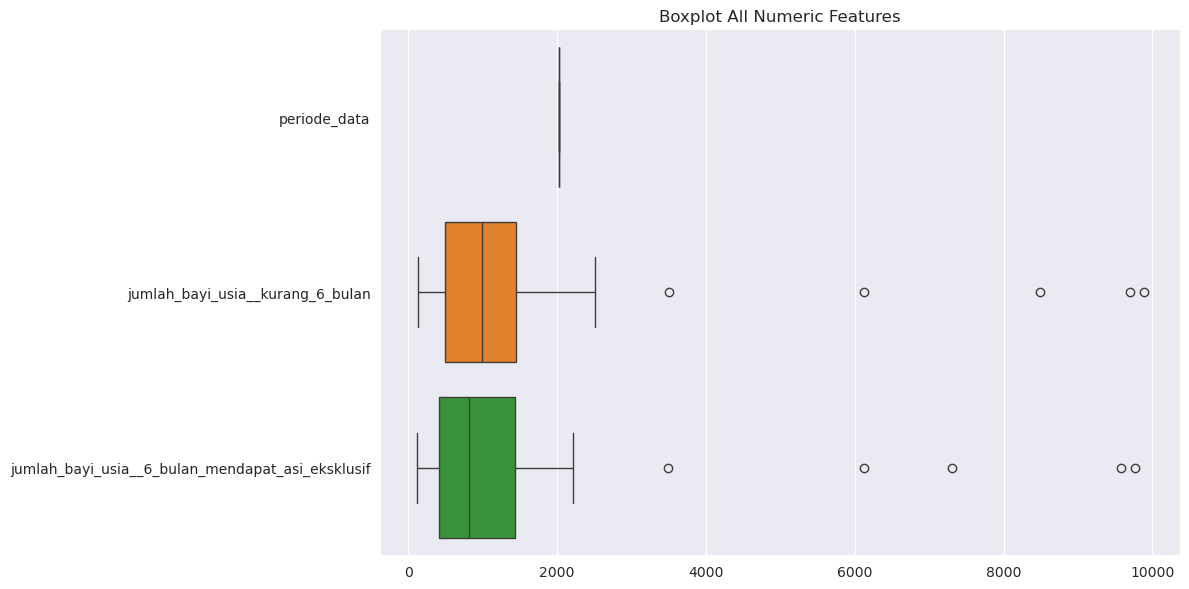

In [4]:
# Ambil Fitur Numeriknya
num_cols = df.select_dtypes(include='number').columns

import matplotlib.pyplot as plt
# Boxplot multiple kolom numerik sekaligus
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title("Boxplot All Numeric Features")
plt.tight_layout()
plt.show()

### Kita gak usah Handle Outlier karena itu representasi wilayah real (misal Tanjung Priok emang populasinya tinggi).

In [5]:

# encoder
encoder = OneHotEncoder(sparse_output=False)

# transform hanya kolom kecamatan
encoded = encoder.fit_transform(df[["kecamatan"]])

# bikin DataFrame hasil OHE
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["kecamatan"]))

# gabungkan dengan kolom lain (drop dulu kolom 'kecamatan' biar gak dobel)
df_ohe = pd.concat([df.drop(columns=["kecamatan"]), encoded_df], axis=1)

df_ohe.head()


,periode_data,wilayah,jumlah_bayi_usia__kurang_6_bulan,jumlah_bayi_usia__6_bulan_mendapat_asi_eksklusif,kecamatan_CAKUNG,kecamatan_CEMPAKA PUTIH,kecamatan_CENGKARENG,kecamatan_CILANDAK,kecamatan_CILINCING,kecamatan_CIPAYUNG,...,kecamatan_PESANGGRAHAN,kecamatan_PULOGADUNG,kecamatan_SAWAH BESAR,kecamatan_SENEN,kecamatan_SETIABUDI,kecamatan_TAMAN SARI,kecamatan_TAMBORA,kecamatan_TANAH ABANG,kecamatan_TANJUNG PRIOK,kecamatan_TEBET
0,2024,KOTA ADM. JAKARTA PUSAT,1352,1352,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,KOTA ADM. JAKARTA PUSAT,1108,1088,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,KOTA ADM. JAKARTA PUSAT,2052,2048,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,KOTA ADM. JAKARTA PUSAT,3504,3484,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,KOTA ADM. JAKARTA PUSAT,1118,1113,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Drop fitur wilayah

In [6]:
df_ohe.drop(columns=["wilayah"], inplace=True)

### Split data

In [7]:
X = df_ohe.drop(columns=["jumlah_bayi_usia__kurang_6_bulan"])  # fitur
y = df_ohe["jumlah_bayi_usia__kurang_6_bulan"]  # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Scaling

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

In [9]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

## Fitting
rf.fit(X_train, y_train)

## Prediksi
y_pred = rf.predict(X_test)

## evaluasi
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")

MSE: 6371.9566
MAE: 59.69777777777777
r2 score: 0.9396119460190311
RMSE: 79.82453632812408


### Learning curve

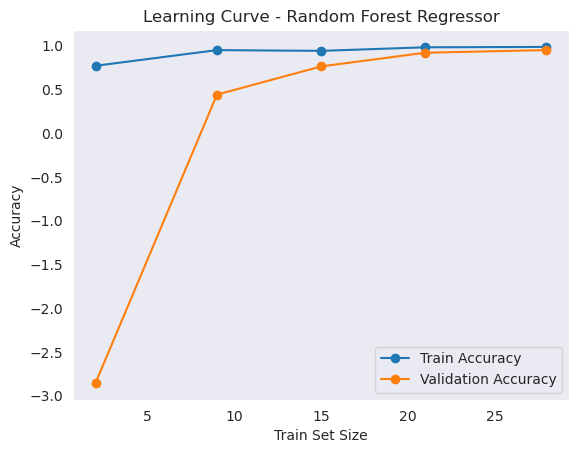

In [10]:
# learning curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='r2'
)

# Rata-rata accuracy
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Train Accuracy")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation Accuracy")
plt.legend()
plt.xlabel("Train Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest Regressor")
plt.grid()
plt.show()


#### MSE = 6371 → cukup kecil kalau dibanding skala target (misalnya jumlah bayi ratusan–ribuan).
#### MAE = 59.7 → rata-rata salah prediksi cuma sekitar 60 bayi. Kalau target aslinya ribuan, ini termasuk oke.
#### RMSE = 79.8 → error rata-rata masih di range puluhan, nggak jauh beda sama MAE (artinya error stabil, nggak ada outlier parah).
#### R² = 0.9396 (~94%) → artinya model bisa jelasin 94% variasi data → super bagus untuk dataset real-life kayak gini.

### Hyperparameter tuning (GridSearchCV)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Model dasar
rf_gsc = RandomForestRegressor(random_state=42)

# Grid hyperparameter
param_grid = {
    "n_estimators": [85, 100, 110],       # jumlah pohon
    "max_depth": [None, 10, 20, 30],       # kedalaman pohon
    "min_samples_split": [2, 5, 10],       # minimal sample buat split node
    "min_samples_leaf": [1, 2, 4],         # minimal sample per leaf
    # "max_features": ["sqrt", "log2"]       # fitur yg dipakai per split
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_gsc,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # pake semua core CPU
    # verbose=2,
    scoring="r2"         # pake R² sebagai metric utama
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

# --- Tambahan untuk Evaluasi ---

# Dapatkan skor R2 terbaik dari cross-validation
print(f"Skor R2 terbaik dari cross-validation: {grid_search.best_score_:.4f}")

# Dapatkan model terbaik
best_model = grid_search.best_estimator_

# Lakukan prediksi pada data pengujian
y_pred_grs = best_model.predict(X_test)

# Hitung skor R2 pada data pengujian
print(f"MSE: {mean_squared_error(y_test, y_pred_grs)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_grs)}")
print(f"r2 score: {r2_score(y_test, y_pred_grs)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_grs)}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}
Best R² Score: 0.9480453520376741
Skor R2 terbaik dari cross-validation: 0.9480
MSE: 6243.9737924701585
MAE: 58.94545454545456
r2 score: 0.9408248595987858
RMSE: 79.01881922978954


### Learning curve for GridsearchCV

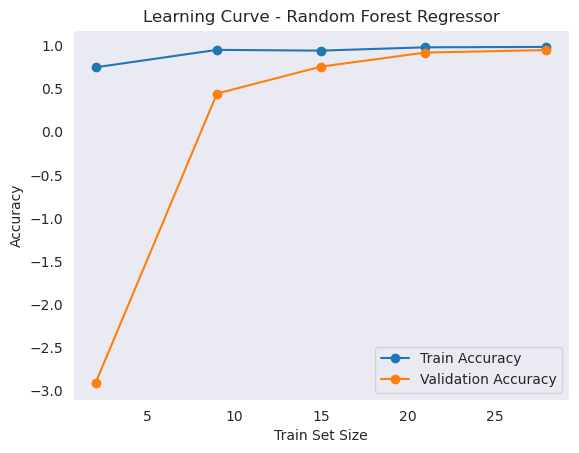

In [12]:
# learning curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='r2'
)

# Rata-rata accuracy
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Train Accuracy")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation Accuracy")
plt.legend()
plt.xlabel("Train Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest Regressor")
plt.grid()
plt.show()
